In [ ]:
# Uncomment the code given below
!pip install qiskit
!pip install qiskit-ibm-runtime
!pip install qiskit-aer
!pip install 'qiskit[visualization]'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 65.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 343.3/343.3 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.9/434.9 kB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 55.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.5/69.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/13

In [ ]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from qiskit_aer import Aer

In [ ]:
import numpy as np

def variational_method_2x2(H):
    # Trial wavefunction psi_c = [cosθ, sinθ]
    # We minimize <ψ|H|ψ> / <ψ|ψ>
    theta = np.linspace(0, np.pi/2, 100)
    min_energy = float('inf')
    best_theta = 0

    for t in theta:
        psi = np.array([np.cos(t), np.sin(t)])
        energy = psi.T @ H @ psi  # Expectation value <ψ|H|ψ>
        if energy < min_energy:
            min_energy = energy
            best_theta = t

    # Exact minimum eigenvalue for verification
    eigvals = np.linalg.eigvals(H)
    exact_min = min(eigvals.real)

    return min_energy, exact_min

# Define matrices
H1 = np.array([[1, 0.2], [0.1, 2]])
H2 = np.array([[2, 0.1], [0.3, -2]])
H3 = np.array([[4, -0.1], [0.2, 2]])

# Solve
for i, H in enumerate([H1, H2, H3], 1):
    min_e, exact_e = variational_method_2x2(H)
    print(f"H{i}:")
    print(f"Variational min eigenvalue: {min_e:.4f}")
    print(f"Exact min eigenvalue: {exact_e:.4f}\n")





H1:
Variational min eigenvalue: 1.0000
Exact min eigenvalue: 0.9804

H2:
Variational min eigenvalue: -2.0000
Exact min eigenvalue: -2.0075

H3:
Variational min eigenvalue: 2.0000
Exact min eigenvalue: 2.0101



Q2

In [ ]:
H = np.array([[1, 0.1, 0], [0.3, 4, 0.2], [0, 0.1, 3]])

# (a) Single parameter
def variational_3x3_single(H):
    theta = np.linspace(0, np.pi/2, 100)
    min_energy = float('inf')

    for t in theta:
        psi = np.array([np.cos(t), np.sin(t), 0])  # Simplified trial state
        energy = psi.T @ H @ psi / (psi.T @ psi)
        if energy < min_energy:
            min_energy = energy

    exact_min = min(np.linalg.eigvals(H).real)
    return min_energy, exact_min

# (b) Two parameters
def variational_3x3_two(H):
    theta1 = np.linspace(0, np.pi/2, 50)
    theta2 = np.linspace(0, np.pi/2, 50)
    min_energy = float('inf')

    for t1 in theta1:
        for t2 in theta2:
            psi = np.array([np.cos(t1), np.sin(t1)*np.cos(t2), np.sin(t1)*np.sin(t2)])
            energy = psi.T @ H @ psi / (psi.T @ psi)
            if energy < min_energy:
                min_energy = energy

    exact_min = min(np.linalg.eigvals(H).real)
    return min_energy, exact_min

e1, ex1 = variational_3x3_single(H)
e2, ex2 = variational_3x3_two(H)
print(f"Single parameter: Variational: {e1:.4f}, Exact: {ex1:.4f}")
print(f"Two parameters: Variational: {e2:.4f}, Exact: {ex2:.4f}")

Single parameter: Variational: 1.0000, Exact: 0.9900
Two parameters: Variational: 1.0000, Exact: 0.9900


Q3

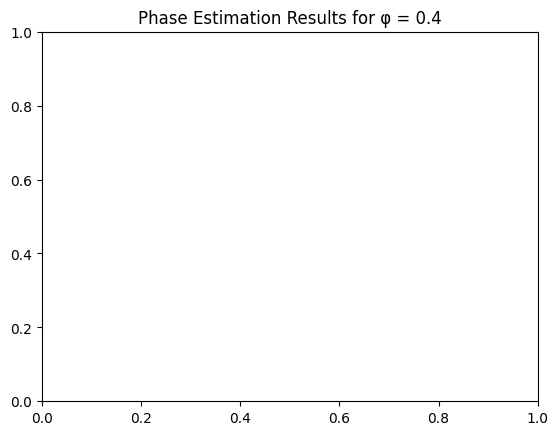

Most frequent result: 0011110110
Corresponding integer a: 246
Actual phase φ: 0.4
Estimated phase φ = a/2^(n-1) = 246/2^9 = 0.48046875
Error: 0.08046874999999998


In [ ]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from qiskit_aer import Aer

n = 10
shots = 1000
phi = 2/5

qc = QuantumCircuit(n + 1, n)

for i in range(n):
    qc.h(i)
qc.x(n)

for q in range(n):
    angle = 2 * np.pi * phi * (2**q)
    qc.cp(angle, q, n)

for i in range(n//2):
    qc.swap(i, n-i-1)

for j in range(n):
    for k in range(j):
        qc.cp(-2*np.pi/2**(j-k), k, j)
    qc.h(j)

for i in range(n):
    qc.measure(i, i)

simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=shots)
result = job.result()

counts = result.get_counts()
plot_histogram(counts)
plt.title(f"Phase Estimation Results for φ = {phi}")

plt.show()

most_frequent = max(counts, key=counts.get)
a = int(most_frequent, 2)
estimated_phi = a / (2**(n-1))

print(f"Most frequent result: {most_frequent}")
print(f"Corresponding integer a: {a}")
print(f"Actual phase φ: {phi}")
print(f"Estimated phase φ = a/2^(n-1) = {a}/2^{n-1} = {estimated_phi}")
print(f"Error: {abs(phi - estimated_phi)}")

Q4

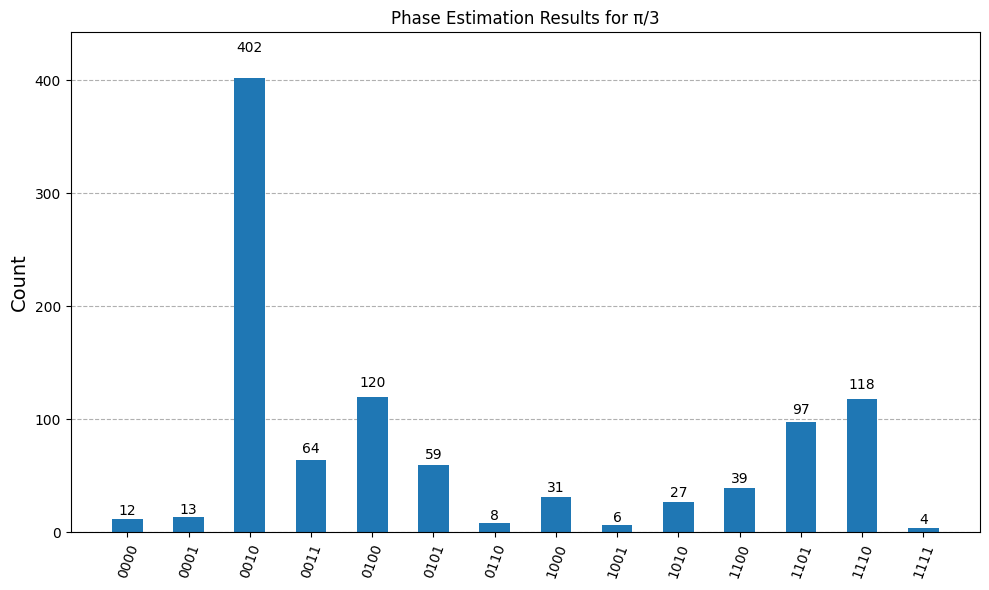

Most frequent result: 0010
Corresponding integer a: 2
Actual phase: π/3 ≈ 1.047198 radians
Actual phase (normalized by 2π): 0.166667
Estimated phase: 0.785398 radians
Estimated phase (normalized by 2π): 0.125000
Error: 0.041667


In [ ]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from qiskit_aer import Aer

first_register_size = 4
qc = QuantumCircuit(first_register_size + 1, first_register_size)

for i in range(first_register_size):
    qc.h(i)
qc.x(first_register_size)

actual_phase = np.pi/3 / (2*np.pi)

for i in range(first_register_size):
    n = first_register_size - 1 - i
    repetitions = 2**n
    for _ in range(repetitions):
        qc.cp(np.pi/3, i, first_register_size)

for i in range(first_register_size//2):
    qc.swap(i, first_register_size-i-1)

for j in range(first_register_size):
    for k in range(j):
        qc.cp(-2*np.pi/2**(j-k), k, j)
    qc.h(j)

for i in range(first_register_size):
    qc.measure(i, i)

shots = 1000
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=shots)
result = job.result()

counts = result.get_counts()


fig, ax = plt.subplots(figsize=(10, 6))
plot_histogram(counts, ax=ax)
plt.title("Phase Estimation Results for π/3")
plt.tight_layout()
plt.show()

most_frequent = max(counts, key=counts.get)
a = int(most_frequent, 2)
estimated_phase = a / (2**first_register_size)
estimated_phase_radians = estimated_phase * 2 * np.pi
error = abs(actual_phase - estimated_phase)

print(f"Most frequent result: {most_frequent}")
print(f"Corresponding integer a: {a}")
print(f"Actual phase: π/3 ≈ {np.pi/3:.6f} radians")
print(f"Actual phase (normalized by 2π): {actual_phase:.6f}")
print(f"Estimated phase: {estimated_phase_radians:.6f} radians")
print(f"Estimated phase (normalized by 2π): {estimated_phase:.6f}")
print(f"Error: {error:.6f}")

Q5

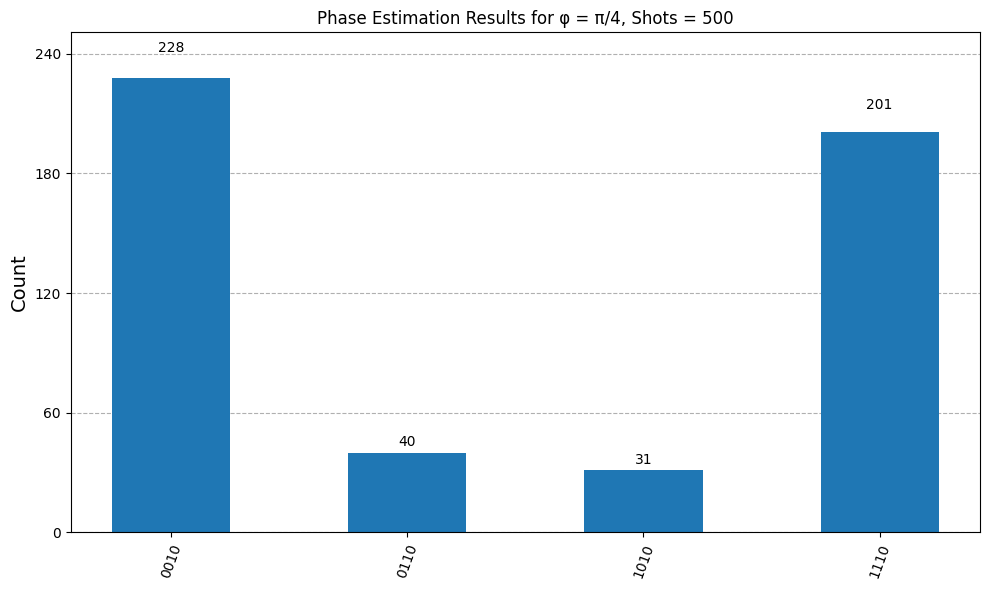

Shots: 500
Most frequent result: 0010
Estimated phase: 0.125000
Actual phase: 0.125000
Error: 0.000000
----------------------------------------


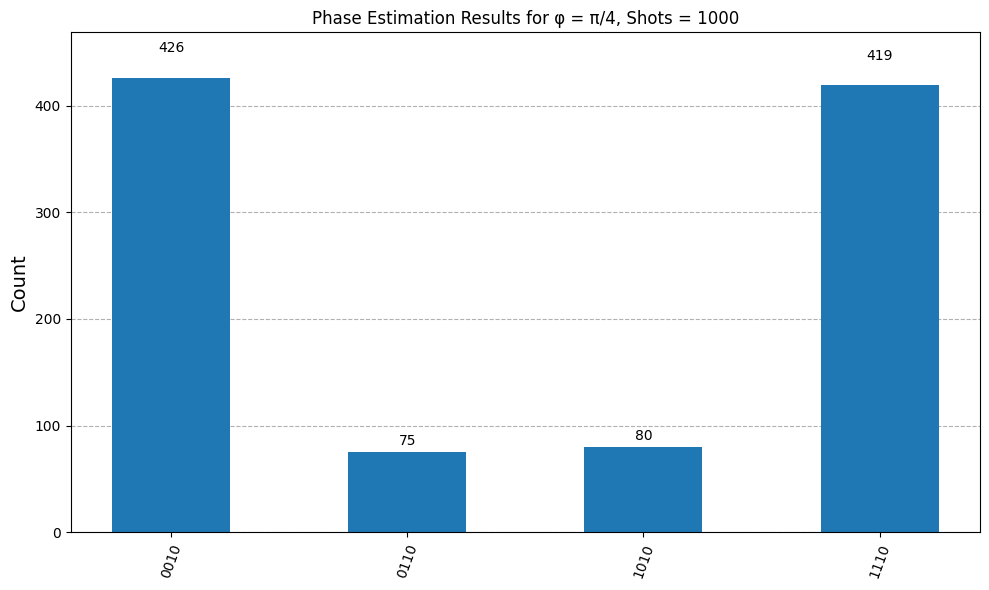

Shots: 1000
Most frequent result: 0010
Estimated phase: 0.125000
Actual phase: 0.125000
Error: 0.000000
----------------------------------------


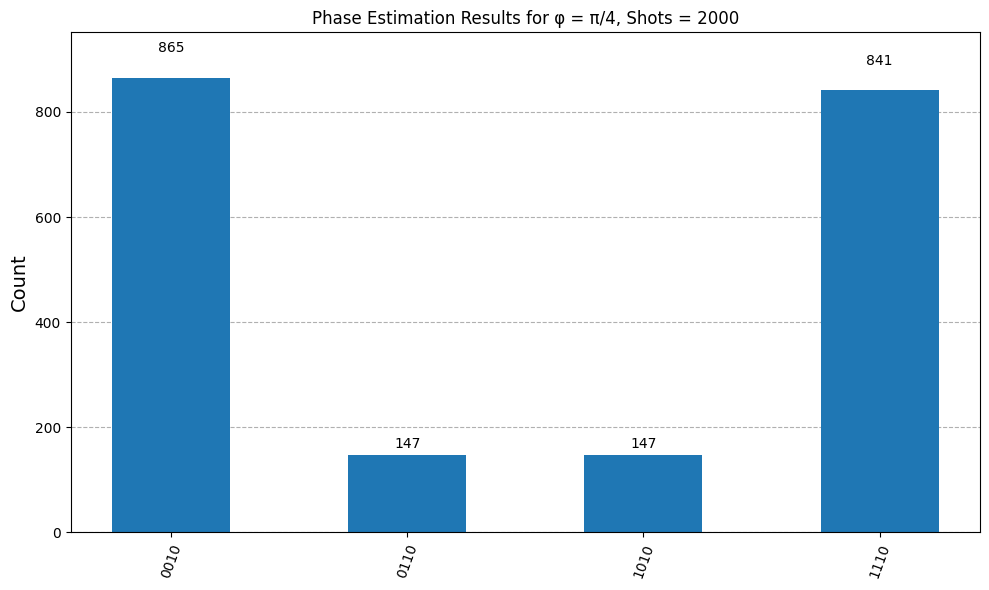

Shots: 2000
Most frequent result: 0010
Estimated phase: 0.125000
Actual phase: 0.125000
Error: 0.000000
----------------------------------------


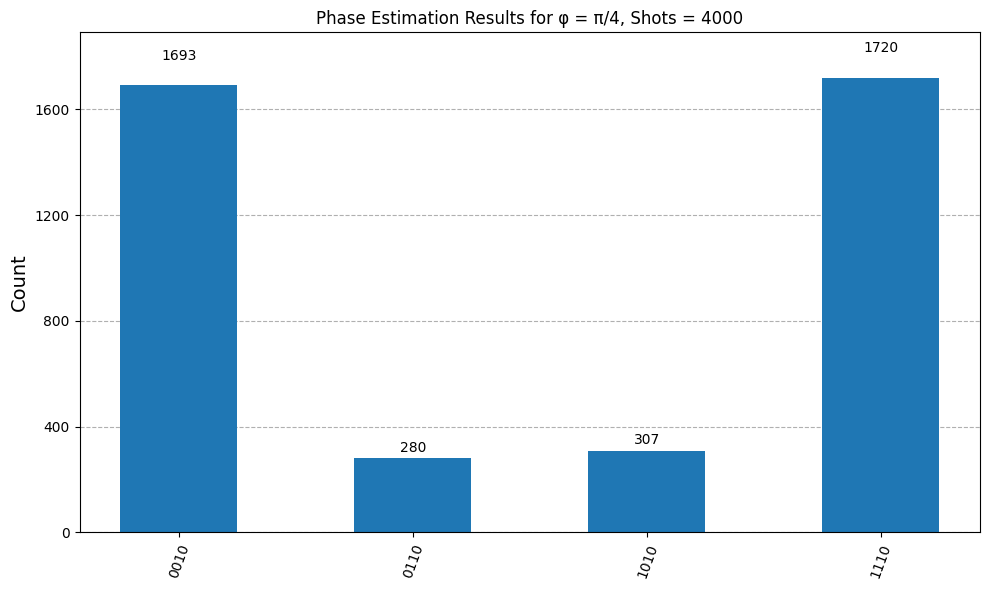

Shots: 4000
Most frequent result: 1110
Estimated phase: 0.875000
Actual phase: 0.125000
Error: 0.750000
----------------------------------------


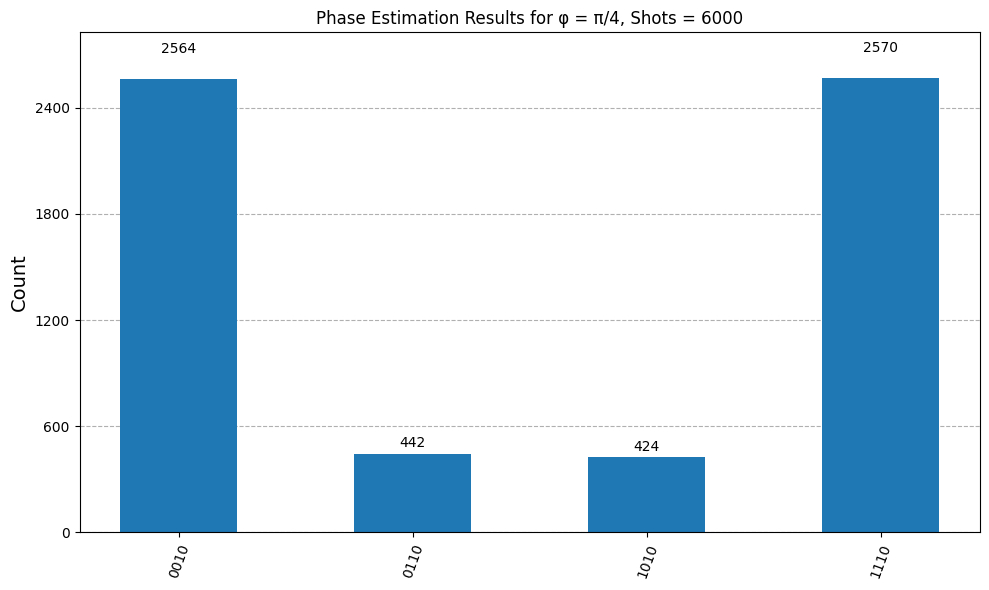

Shots: 6000
Most frequent result: 1110
Estimated phase: 0.875000
Actual phase: 0.125000
Error: 0.750000
----------------------------------------


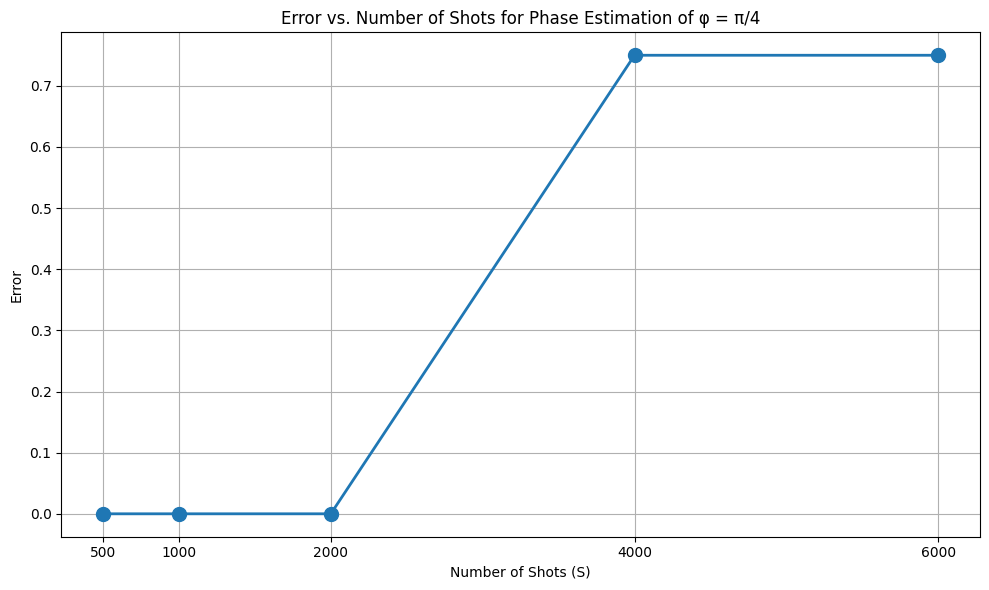


Summary of results:
Shots: 500, Error: 0.000000
Shots: 1000, Error: 0.000000
Shots: 2000, Error: 0.000000
Shots: 4000, Error: 0.750000
Shots: 6000, Error: 0.750000


In [ ]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from qiskit_aer import Aer

S = [500, 1000, 2000, 4000, 6000]
Error = []

phi = np.pi/4 / (2*np.pi)
n = 4

for shots in S:
    qc = QuantumCircuit(n + 1, n)

    for i in range(n):
        qc.h(i)
    qc.x(n)

    for q in range(n):
        angle = 2 * np.pi * phi * (2**q)
        qc.cp(angle, q, n)

    for i in range(n//2):
        qc.swap(i, n-i-1)

    for j in range(n):
        for k in range(j):
            qc.cp(-2*np.pi/2**(j-k), k, j)
        qc.h(j)

    for i in range(n):
        qc.measure(i, i)

    simulator = Aer.get_backend('qasm_simulator')
    compiled_circuit = transpile(qc, simulator)
    job = simulator.run(compiled_circuit, shots=shots)
    result = job.result()

    counts = result.get_counts()


    fig, ax = plt.subplots(figsize=(10, 6))
    plot_histogram(counts, ax=ax)
    plt.title(f"Phase Estimation Results for φ = π/4, Shots = {shots}")
    plt.tight_layout()
    plt.show()

    most_frequent = max(counts, key=counts.get)
    a = int(most_frequent, 2)
    estimated_phi = a / (2**n)

    error = abs(phi - estimated_phi)
    Error.append(error)

    print(f"Shots: {shots}")
    print(f"Most frequent result: {most_frequent}")
    print(f"Estimated phase: {estimated_phi:.6f}")
    print(f"Actual phase: {phi:.6f}")
    print(f"Error: {error:.6f}")
    print("-" * 40)


fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(S, Error, 'o-', linewidth=2, markersize=10)
plt.xlabel('Number of Shots (S)')
plt.ylabel('Error')
plt.title('Error vs. Number of Shots for Phase Estimation of φ = π/4')
plt.grid(True)
plt.xticks(S)
plt.tight_layout()
plt.show()

print("\nSummary of results:")
for i, shots in enumerate(S):
    print(f"Shots: {shots}, Error: {Error[i]:.6f}")

## Q6

Number of qubits: 3
Most frequent result: 110
Estimated phase: 0.750000
Actual phase: 0.200000
Error: 0.550000
----------------------------------------


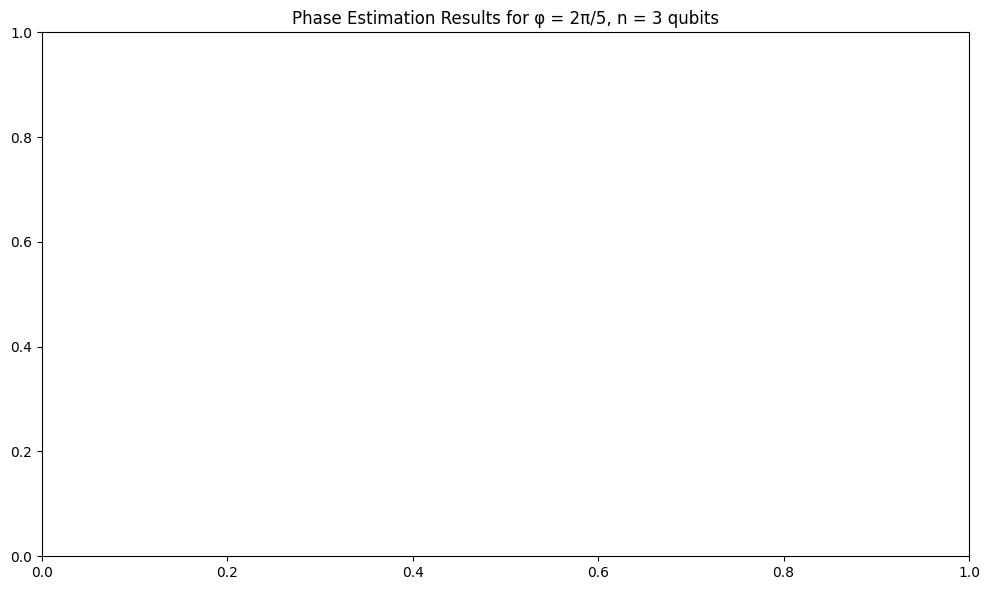

Number of qubits: 4
Most frequent result: 1111
Estimated phase: 0.937500
Actual phase: 0.200000
Error: 0.737500
----------------------------------------


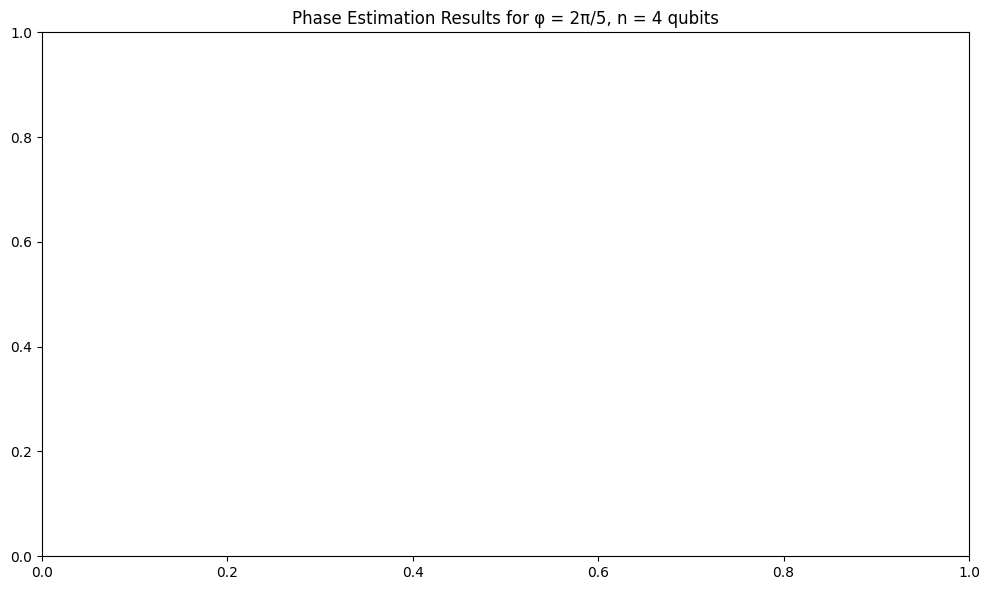

Number of qubits: 5
Most frequent result: 11110
Estimated phase: 0.937500
Actual phase: 0.200000
Error: 0.737500
----------------------------------------


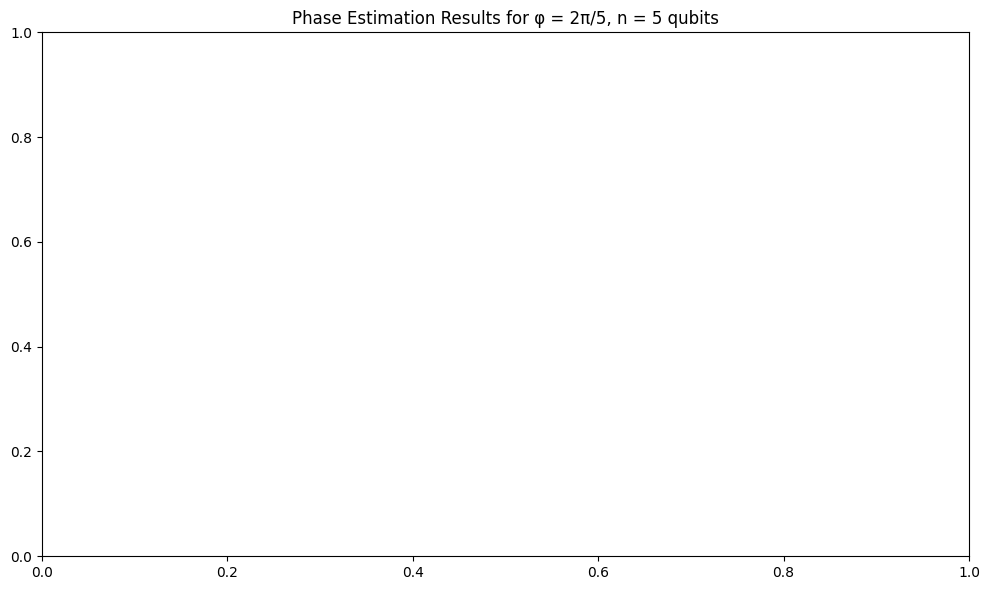

Number of qubits: 6
Most frequent result: 111011
Estimated phase: 0.921875
Actual phase: 0.200000
Error: 0.721875
----------------------------------------


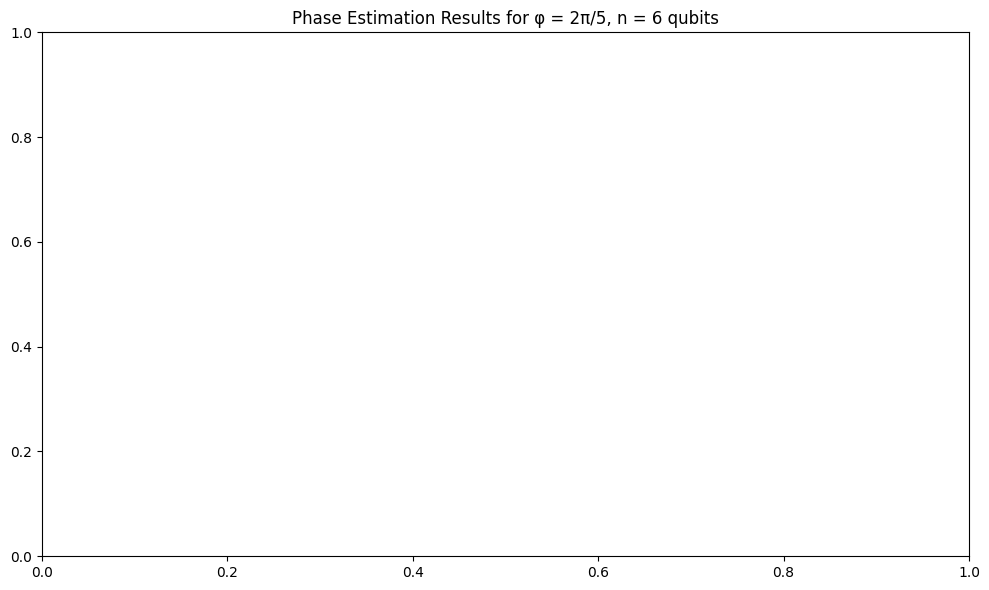

Number of qubits: 7
Most frequent result: 1110110
Estimated phase: 0.921875
Actual phase: 0.200000
Error: 0.721875
----------------------------------------


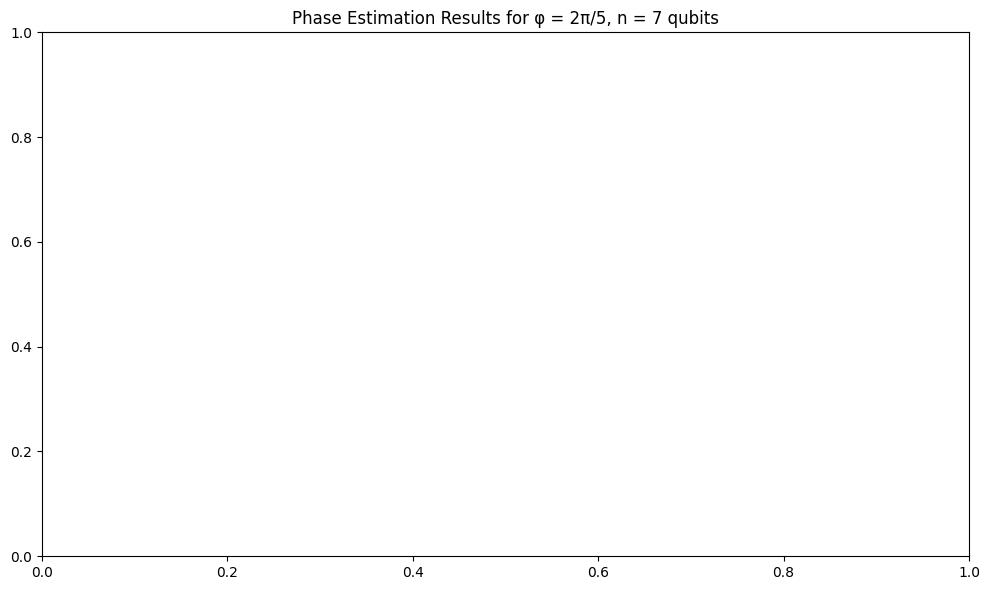

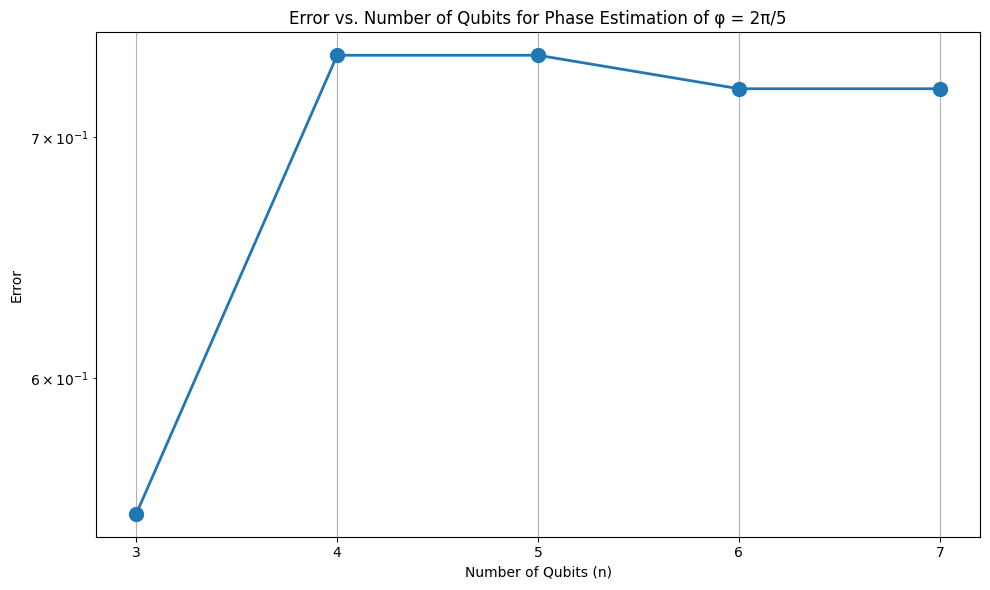


Summary of results:
Number of qubits: 3, Error: 0.550000
Number of qubits: 4, Error: 0.737500
Number of qubits: 5, Error: 0.737500
Number of qubits: 6, Error: 0.721875
Number of qubits: 7, Error: 0.721875


In [ ]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from qiskit_aer import Aer

n_values = [3, 4, 5, 6, 7]
Error = []

phi = 2*np.pi/5 / (2*np.pi)
shots = 1000

for n in n_values:
    qc = QuantumCircuit(n + 1, n)

    for i in range(n):
        qc.h(i)
    qc.x(n)

    for q in range(n):
        angle = 2 * np.pi * phi * (2**q)
        qc.cp(angle, q, n)

    for i in range(n//2):
        qc.swap(i, n-i-1)

    for j in range(n):
        for k in range(j):
            qc.cp(-2*np.pi/2**(j-k), k, j)
        qc.h(j)

    for i in range(n):
        qc.measure(i, i)

    simulator = Aer.get_backend('qasm_simulator')
    compiled_circuit = transpile(qc, simulator)
    job = simulator.run(compiled_circuit, shots=shots)
    result = job.result()

    counts = result.get_counts()
    most_frequent = max(counts, key=counts.get)

    if len(most_frequent) < n:
        most_frequent = most_frequent.zfill(n)

    a = int(most_frequent, 2)
    estimated_phi = a / (2**n)

    error = abs(phi - estimated_phi)
    Error.append(error)

    print(f"Number of qubits: {n}")
    print(f"Most frequent result: {most_frequent}")
    print(f"Estimated phase: {estimated_phi:.6f}")
    print(f"Actual phase: {phi:.6f}")
    print(f"Error: {error:.6f}")
    print("-" * 40)

    plt.figure(figsize=(10, 6))
    plot_histogram(counts)
    plt.title(f"Phase Estimation Results for φ = 2π/5, n = {n} qubits")
    plt.tight_layout()
    plt.show()

plt.figure(figsize=(10, 6))
plt.plot(n_values, Error, 'o-', linewidth=2, markersize=10)
plt.xlabel('Number of Qubits (n)')
plt.ylabel('Error')
plt.title('Error vs. Number of Qubits for Phase Estimation of φ = 2π/5')
plt.grid(True)
plt.xticks(n_values)
plt.yscale('log')
plt.tight_layout()
plt.show()

print("\nSummary of results:")
for i, n in enumerate(n_values):
    print(f"Number of qubits: {n}, Error: {Error[i]:.6f}")
